In [7]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________

import CONFIG
import CORRECTIONS
import DBPARSE

In [8]:
pas="1"
config="3"

In [9]:
W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")
#dymin=-.984
#dymax=.9
#W2max=1.75
#dybgmin=-1.2
#dybgmax=1.2
print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

W2min: -0.5
W2max: 1.7
dxmin: -0.4
dxmax: 0.4
dymin: -0.5
dymax: 0.5
dybgmin: -1.3
dybgmax: 1.2
Coin Min: 88 Coin Max: 100


In [10]:


fileDIR=(f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
resolved_path = os.path.abspath(fileDIR)
print(f"Resolved Path: {resolved_path}")
print(f"File Exists: {os.path.exists(resolved_path)}")
def Function_ASYMMETRY(config):
    r.gErrorIgnoreLevel = r.kError  # Suppress Info and Warning messages

    r.gStyle.SetOptStat(0)
    r.gStyle.SetOptFit(1)
    
    #_____bring in config values______#
    coinVector=CONFIG.Function_JSON("GEN"+config,"../config/coin.cfg")
    he3spot=CONFIG.Function_JSON("GEN"+config+"He3","../config/spotsize.cfg")
    he3spotsim=CONFIG.Function_JSON("GEN"+config+"He3sim","../config/spotsize.cfg")
    
    
    
    #here, set coincidence cut and spot cut values
    coinSigma=3
    coin_low=coinVector[0]-coinSigma*coinVector[1]
    coin_high=coinVector[0]+coinSigma*coinVector[1]

    hix_n_3=he3spotsim[7];
    lowx_n_3=he3spotsim[6];
    hix_p_3=he3spotsim[5];
    lowx_p_3=he3spotsim[4];
    hiy_p3=he3spotsim[1];
    lowy_p3=he3spotsim[0];
    hiy_n3=he3spotsim[3];
    lowy_n3=he3spotsim[2];
    
    
    hiydata=he3spot[1];
    lowydata=he3spot[0];
    hixdatan=he3spot[7];
    lowxdatan=he3spot[6];
    hixdatap=he3spot[5];
    lowxdatap=he3spot[4];
   # hiydata=.5;
    #lowydata=-.45;


    
    
    
    
    
    
        # Define ROOT file paths
    rootfilenp = f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root"
    rootfilep = f"../outfiles/Pass1/QE_sim_GEN{config}_sbs100p_nucleon_np_model2.root"

    if config == "4":
        config = "4b"

        # Load the TTrees
    B = r.TChain("Tout")
    C = r.TChain("Tout")

    dx_np = array.array('d', [0])
    dx_p = array.array('d', [0])
    dy_np = array.array('d', [0])
    dy_p = array.array('d', [0])
    W2_np = array.array('d', [0])
    W2_p = array.array('d', [0])
    coin_np = array.array('d', [0])
    weight = array.array('d', [0])
    helicity_p = array.array('i', [0])
    IHWP_p = array.array('i', [0])
    runnum_p = array.array('i', [0])
    helicity_np = array.array('i', [0])
    IHWP_np = array.array('i', [0])
    runnum_np = array.array('i', [0])

    # Load the TTrees

    C.Add(rootfilenp)
    B.Add(rootfilep)

    # Disable all branches initially
    C.SetBranchStatus("*", 0)
    B.SetBranchStatus("*", 0)

    # Enable specific branches
    branches = ["dx", "dy", "W2", "helicity", "IHWP", "runnum", "coinCut", "coin_time"]
    b2=["dx", "dy", "W2"]
    for branch in branches:
        C.SetBranchStatus(branch, 1)
    for branch in b2:
        B.SetBranchStatus(branch, 1)

    B.SetBranchStatus("weight", 1)

    # Set branch addresses
    C.SetBranchAddress("dx", dx_np)
    B.SetBranchAddress("dx", dx_p)
    C.SetBranchAddress("dy", dy_np)
    B.SetBranchAddress("dy", dy_p)
    C.SetBranchAddress("W2", W2_np)
    B.SetBranchAddress("W2", W2_p)
    C.SetBranchAddress("helicity", helicity_np)
    #B.SetBranchAddress("helicity", helicity_p)
    C.SetBranchAddress("IHWP", IHWP_np)
    #B.SetBranchAddress("IHWP", IHWP_p)
    C.SetBranchAddress("coin_time", coin_np)
    #B.SetBranchAddress("coin_time", coin_pp)
    C.SetBranchAddress("runnum", runnum_np)
    #B.SetBranchAddress("runnum", runnum_p)
    B.SetBranchAddress("weight", weight)
    # Assuming the variables are already defined or loaded from the ROOT file
    


    
    nEntries_np = C.GetEntries()
    nEntries_p = B.GetEntries()
    C.GetEntry(0)
    thisnum = runnum_np[0]
    nplus_np = 0
    pplus_np = 0
    nminus_np = 0
    pminus_np = 0
    pYield=[]
    nYield=[]
    runnumVec = []
    runnumA_p = []
    runnumA_n = []
    runnumA_targetpol = []
    runnumA_beampol = []
    Err_A_n = []
    Err_A_p = []
    QE = 0
    analyze=True
    # Loop over the entries
    
    

    for i in range(nEntries_np):
        C.GetEntry(i)
        if runnum_np[0] > 2165 and runnum_np[0]<4470:
            if thisnum == runnum_np[0]:
                if IHWP_np[0] == 1:
                    helicity_np[0] *= 1

                elif IHWP_np[0] == -1:
                    helicity_np[0] *= -1
                else:
                    continue
                #____________CUTS_______________________________      
                ycut = dymin < dy_np[0] < dymax
                bgycut=dybgmin<dy_np[0]<dybgmax
                coin_cut = coinmin < coin_np[0] < coinmax
                W2cut=W2min < W2_np[0] < W2max
                xcutn = dxmin < dx_np[0] < dxmax
                #________________________________________________ 
                
               
                xcutp = lowxdatap < dx_np[0] < hixdatap
                
                
                if coin_cut and W2cut and runnum_np[0] > 2165 and ycut and xcutn:
                    QE += 1

                    if helicity_np[0] == 1:
                        nplus_np += 1
                    if helicity_np[0] == -1:
                        nminus_np += 1
                
                #if coin_cut and W2cut and runnum_np[0] > 2165 and ycut and xcutp:
                #    QE += 1
                #    if helicity_np[0] == 1:
                #        pplus_np += 1
                #    if helicity_np[0] == -1:
                 #       pminus_np += 1
        
            else:
                analyze = True
                #print(f"{QE} Quasi elastic events.")
                if nplus_np<1 or nminus_np<1:
                    analyze = False
                if analyze:
                    #print(nplus_np+nminus_np)
                    n_Asym = (nplus_np - nminus_np) * 1.0 / (nplus_np + nminus_np)
                    #p_Asym = (pplus_np - pminus_np) * 1.0 / (pplus_np + pminus_np)
                    #print(f"Asymmetry for run number {thisnum}: {n_Asym} {p_Asym}")
                    if runnum_np[0] > 2165 and runnum_np[0]< 4470:
                        runnumVec.append(runnum_np[0])
                        runnumA_n.append(n_Asym)
                        #runnumA_p.append(p_Asym)
                        #pYield.append(pplus_np+pminus_np)
                        nYield.append(nplus_np+nminus_np)
                        Err_A_n.append(2 * math.sqrt(nplus_np * nminus_np) / (nplus_np + nminus_np)**(3/2))
                        #Err_A_p.append(2 * math.sqrt(pplus_np * pminus_np) / (pplus_np + pminus_np)**(3/2))
                        #Err_A_p.append(0)
                        thisnum = runnum_np[0]
                QE = 0
                nminus_np = 0
                nplus_np = 0
            
                thisnum = runnum_np[0]
        else:
            thisnum = runnum_np[0]
            
        runnumA_p=0
        Err_A_p=0
        pYield=0
    return runnumVec,runnumA_n,runnumA_p,Err_A_n,Err_A_p,nYield,pYield
   

Resolved Path: /home/research/GEn/GEn Data Analysis/outfiles/Pass1/QE_data_GEN3_sbs100p_nucleon_np_model2.root
File Exists: True


# Calculate the asymmetry and get the errors, yields, and polarizations by run number

In [11]:
runs,An,Ap,EAn,EAp,nYield,pYield=Function_ASYMMETRY(config)

Error in <THashList::Delete>: A list is accessing an object (0x2816faf0) already deleted (list name = THashList)


In [12]:
np.sum(nYield)

35079

In [13]:
import numpy as np
beamPol=np.empty(0);
he3Pol=np.empty(0);
for i in range(0,len(runs)):
    beamPol=np.append(beamPol,DBPARSE.Function_RETURNPROCESSEDBEAMPOL(runs[i]))
    he3Pol=np.append(he3Pol,DBPARSE.Function_RETURNPROCESSEDHE3POL(runs[i]))

In [14]:
print(np.mean(he3Pol),np.mean(beamPol))

41.59367512067612 86.48800000000001


# Here we bring in all correction fractions and asymmetries

### Error for corrections

In [15]:
def fAE_calc(f, fE, A, AE):
    #used to calculate error of fA= f1A1+f2A2+...
    f = np.array(f)
    fE = np.array(fE)
    A = np.array(A)
    AE = np.array(AE)
    
    error_terms = (f * AE)**2 + (A * fE)**2
    return np.sqrt(np.sum(error_terms))
def fE_calc(errors):
    #used to calculate error of f=f1+f2+f3
    errors = np.array(errors)
    return np.sqrt(np.sum(errors**2))

In [16]:
#corr = Sum(f_i*A_i) i is type of correction f is fraction A is asymmetry
#f=Sum(f_i)

facc=np.sum(np.load(f'CorrectionArrays/Pass{pas}/facc{config}.npy'))
Efacc=.05*facc
Aacc=np.sum(np.load(f'CorrectionArrays/Pass{pas}/Aacc{config}.npy'))
Eacc2=.05*Aacc
Eacc=np.sum(np.load(f'CorrectionArrays/Pass{pas}/AaccE{config}.npy'))

fproton=np.sum(np.load(f'CorrectionArrays/Pass{pas}/fproton{config}.npy'))
Efproton=.005*fproton
Aproton=np.sum(np.load(f'CorrectionArrays/Pass{pas}/Aproton{config}.npy'))
Eproton=.005*Aproton

fpion=0.01
Efpion=.005*fpion
Apion=0
Epion=.005*Apion

fFSI=0
EfFSI=.005*fFSI
AFSI=0
EFSI=.005*AFSI

fnitro=.0157
Efnitro=.005*fnitro

Pneutron=.95
Eneutron=.005*Pneutron

fbg=np.sum(np.load(f'CorrectionArrays/Pass{pas}/fbg{config}.npy'))-fpion-facc-fFSI-fnitro
Efbg=0.05*fbg
Abg=np.sum(np.load(f'CorrectionArrays/Pass{pas}/Abg{config}.npy'))
Ebg=np.sum(np.load(f'CorrectionArrays/Pass{pas}/AbgE{config}.npy'))

#----------------------------------------------------------
farray=[facc,fproton,fbg,fpion,fFSI]
Efarray1=[Efacc,Efproton,Efbg,Efpion,EfFSI]
Efarray2=[Efacc,Efproton,Efbg,Efpion,EfFSI,Efnitro]

Aarray=[Aacc,Aproton,Abg,Apion,AFSI]
AEarray=[Eacc,Eproton,Ebg,Epion,EFSI]

fAE=fAE_calc(farray,Efarray1,Aarray,AEarray)
fE=fE_calc(Efarray2)
#----------------------------------------------------------
fA= facc*Aacc + fproton*Aproton + fbg*Abg + fpion*Apion + fFSI*AFSI

f=facc + fproton + fbg + fpion + fFSI + fnitro
fN=1-f

In [17]:
fA


0.0025245969306046403

In [42]:
f

0.6072

In [18]:
#facc,bg,proton
print(facc,fbg,fproton,f,Aacc,Abg)

0.051 0.5062999999999999 0.0242 0.6072 0.011568998109640832 0.003820093589729127


In [19]:
print(f'Accidentals f:{facc} A:{np.round(Aacc,3)} f*A:{np.round(facc*Aacc,5)}')
print(f'Proton----- f:{fproton} A:{np.round(Aproton,6)} f*A:{np.round(fproton*Aproton,8)}')
print(f'Background- f:{fbg} A:{np.round(Abg,3)} f*A:{np.round(fbg*Abg,5)}')
print(f'Pion------- f:{fpion} A:{np.round(Apion,3)} f*A:{np.round(fpion*Apion,5)}')
print(f'FSI-------- f:{fFSI} A:{np.round(AFSI,3)} f*A:{np.round(fFSI*AFSI,5)}')
print(f'Nitrogen--- f:{fnitro}')
print(f'Sum of all Correction fractions times Asymmetry: {np.round(fA,5)}')


Accidentals f:0.051 A:0.012 f*A:0.00059
Proton----- f:0.0242 A:1.9e-05 f*A:4.6e-07
Background- f:0.5062999999999999 A:0.004 f*A:0.00193
Pion------- f:0.01 A:0 f*A:0.0
FSI-------- f:0 A:0 f*A:0
Nitrogen--- f:0.0157
Sum of all Correction fractions times Asymmetry: 0.00252


In [20]:
#W = (A-C)/((1-f)*(1-n)*P_b*P_n*P_t)

# Hear we compute the weighted average

In [21]:
#newAn[i],fA,f,fnitro,beamPol[i]/100,Pneutron,he3Pol[i]/100,EAn[i],fAE,fE,Efnitro,PbE,Eneutron,PtE

In [22]:
def fAE_calc(f, fE, A, AE):
    #used to calculate error of fA= f1A1+f2A2+...
    f = np.array(f)
    fE = np.array(fE)
    A = np.array(A)
    AE = np.array(AE)
    
    error_terms = (f * AE)**2 + (A * fE)**2
    return np.sqrt(np.sum(error_terms))
def fE_calc(errors):
    #used to calculate error of f=f1+f2+f3
    errors = np.array(errors)
    return np.sqrt(np.sum(errors**2))

In [23]:
def weightedAverage(A, C, f, n, P_b, P_n, P_t, sigma_A, sigma_C, sigma_f, sigma_n, sigma_P_b, sigma_P_n, sigma_P_t):
    #A is asymmetry, C is sum(f*A), f is fraction
    #n is nitrogen fraction, Pb Pn Pt are beam, neutron, target polarizations
    W = (A - C) / ((1 - f) * P_b * P_n * P_t)
    
    partial_A = 1 / ((1 - f)  * P_b * P_n * P_t)
    partial_C = -1 / ((1 - f)  * P_b * P_n * P_t)
    partial_f = (A - C) / (((1 - f)**2)  * P_b * P_n * P_t)
    partial_P_b = (A - C) / ((1 - f) * (P_b**2) * P_n * P_t)
    partial_P_n = (A - C) / ((1 - f) * P_b * (P_n**2) * P_t)
    partial_P_t = (A - C) / ((1 - f) * P_b * P_n * (P_t**2))
    
    sigma_W = np.sqrt((partial_A * sigma_A)**2 + 
                      (partial_C * sigma_C)**2 + 
                      (partial_f * sigma_f)**2 + 
                      (partial_P_b * sigma_P_b)**2 + 
                      (partial_P_n * sigma_P_n)**2 + 
                      (partial_P_t * sigma_P_t)**2)
    
    return W, sigma_W

In [24]:
def StatError(Araw,fN,Pb,Pt,PN,ArawSig,fNSig,PbSig,PtSig,PNSig):
    import numpy as np
    S=Araw/(fN*Pb*Pt*PN)
    partial_Araw=1/(fN*Pb*Pt*PN)
    partial_fN=-Araw/(fN**2*Pb*Pt*PN)
    partial_Pb=-Araw/(fN*Pb**2*Pt*PN)
    partial_Pt=-Araw/(fN*Pt**2*Pb*PN)
    partial_PN=-Araw/(fN*PN**2*Pt*Pb)
    S_sig=np.sqrt((partial_Araw*ArawSig)**2+
                 (partial_fN*fNSig)**2+
                  (partial_Pb*PbSig)**2+
                  (partial_Pt*PtSig)**2+
                  (partial_PN*PNSig)**2)
    return S_sig
def SysError(fA,fN,Pb,Pt,PN,fASig,fNSig,PbSig,PtSig,PNSig):
    S=fA/(fN*Pb*Pt*PN)
    partial_fA=1/(fN*Pb*Pt*PN)
    partial_fN=-fA/(fN**2*Pb*Pt*PN)
    partial_Pb=-fA/(fN*Pb**2*Pt*PN)
    partial_Pt=-fA/(fN*Pt**2*Pb*PN)
    partial_PN=-fA/(fN*PN**2*Pt*Pb)
    S_sig=np.sqrt((partial_fA*fASig)**2+
                 (partial_fN*fNSig)**2+
                  (partial_Pb*PbSig)**2+
                  (partial_Pt*PtSig)**2+
                  (partial_PN*PNSig)**2)
    return S_sig

In [25]:
newAn=np.array(An)
newAp=np.array(Ap)
newnYield=np.array(nYield)
newpYield=np.array(pYield)
newAE=np.array(EAn)

weightedSumN=0
weightedSumP=0
sumWeightsN=0
sumWeightsP=0
weightedSumN_New=0
sumWeightsN_New=0
sumWeightsN_Sys=0

polsum=np.empty(0)
counterBad=0
counterGood=0

precorrection=0
precorrectionW=0
for i in range(0,len(newAn)):
    
    PbE=.03*beamPol[i]/100
    PtE=.03*he3Pol[i]/100
    rawE=newAE[i]/(he3Pol[i]*beamPol[i]*Pneutron*(1-f)/10000)
    precorrection+=newAn[i]/(rawE**2)
    precorrectionW+=1/(rawE**2)
    calculate=weightedAverage(newAn[i],fA,f,fnitro,beamPol[i]/100,Pneutron,he3Pol[i]/100,EAn[i],fAE,fE,Efnitro,PbE,Eneutron,PtE)
    #print(w)
    w=calculate[0]
    w_sig= calculate[1] 
    statError=StatError(newAn[i],fN,beamPol[i]/100,he3Pol[i]/100,Pneutron,EAn[i],fE,PbE,PtE,Eneutron)
    sysError=SysError(fA,fN,beamPol[i]/100,he3Pol[i]/100,Pneutron,fAE,fE,PbE,PtE,Eneutron)
    weightedSumN_New+=(w/(statError**2))
    sumWeightsN_New+=1/(statError**2)
    sumWeightsN_Sys+=1/(sysError**2)
    weightedSumN+=(w/(w_sig**2))
    sumWeightsN+=1/(w_sig**2)
    


    
weighted_An=weightedSumN/sumWeightsN
weighted_An_E=math.sqrt(1/sumWeightsN)
weighted_An_Sys=math.sqrt(1/sumWeightsN_Sys)
weighted_An_Stat=math.sqrt(1/sumWeightsN_New)
weighted_An_new=weightedSumN_New/sumWeightsN_New

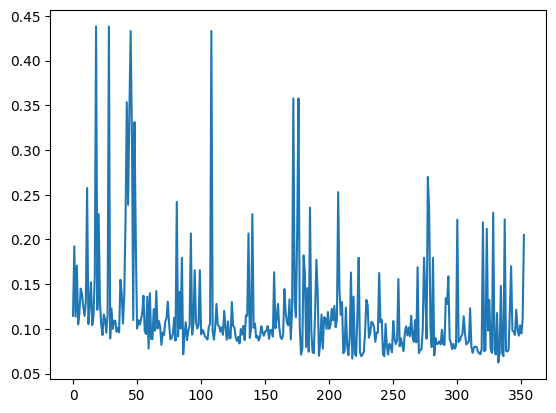

In [44]:
plt.plot(newAE)

In [26]:
weighted_An_new

-0.19414303411209

In [27]:
weighted_An

-0.19390952151477966

In [28]:
weighted_An_E**2

0.0015683836213115578

In [29]:
weighted_An_Stat**2+weighted_An_Sys**2

0.0015682097016697866

In [30]:
weighted_An_Sys

0.00028146490054639563

In [31]:
-0.026515065312741202

-0.026515065312741202

In [32]:
np.mean(newAn)

-0.02045012578361596

In [33]:
precorrection/precorrectionW

-0.024945565240449618

In [34]:
-0.022500985638932155

-0.022500985638932155

In [35]:
-0.012814309930287001

-0.012814309930287001

# Save Array Of Results

In [36]:
np.save(f'SavedArrays/GEN{config}/Pass{pas}/GEN{config}Pass1.npy', {
    'An': newAn,
    'Ap': newAp,
    'EAn': EAn,
    'EAp':EAp,
    'nY':nYield,
    'pY':pYield,
    'beamPol':beamPol,
    'he3Pol':he3Pol,   
    'weightedAn':weighted_An,
    'weightedAn_E':weighted_An_E,
})

In [37]:
weighted_An_E

0.039602823400757145

In [38]:
weighted_An

-0.19390952151477966

In [39]:
0.14006166132667508

0.14006166132667508

In [40]:
np.mean(he3Pol)

41.59367512067612

In [41]:
%%time

x=3

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.9 µs
